1. Read in composite files
2. Plot composites (mmm)
3. Sign comparison between mean and extreme for each variable (for mmm)
4. Individual model comparison - pecentage of agreement? 

In [1]:
# 0. Imports 
import xarray as xr
import numpy as np
import sys
sys.path.append('/home/563/rl5183/PhD-research/Functions')
import functions as func
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import dask
dask.config.set({'array.slicing.split_large_chunks': False})

In [2]:
# 1. Read in ETCCDI data 
elnino_ts = xr.open_dataarray('elnino_comp_ts_cmip6_20.nc')
lanina_ts = xr.open_dataarray('lanina_comp_ts_cmip6_20.nc')
elnino_txx = xr.open_dataarray('elnino_comp_txx_cmip6_20.nc')
lanina_txx = xr.open_dataarray('lanina_comp_txx_cmip6_20.nc')
elnino_tnn = xr.open_dataarray('elnino_comp_tnn_cmip6_20.nc')
lanina_tnn = xr.open_dataarray('lanina_comp_tnn_cmip6_20.nc')

In [3]:
def format_gridlines(ax, top_labels=False, bottom_labels=False, left_labels=False, right_labels=False):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.75, linestyle='--')
    gl.top_labels = top_labels
    gl.bottom_labels = bottom_labels
    gl.right_labels = right_labels
    gl.left_labels = left_labels
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    return ax

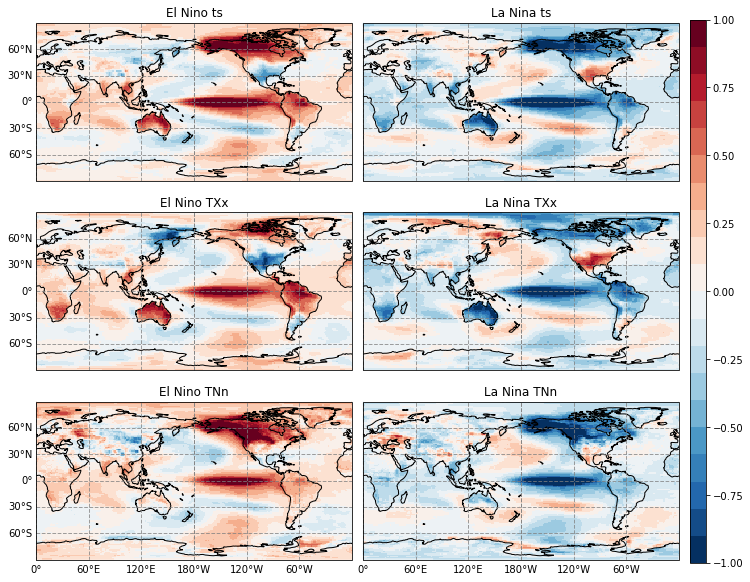

In [20]:
fig = plt.figure(figsize = (12, 10))
gs = gridspec.GridSpec(3,3, wspace=0.05, hspace=.15, width_ratios=[1, 1, 0.05])

ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(180))
im = elnino_ts.mean(dim='model').plot(ax=ax, vmin=-1, vmax=1, cmap=plt.cm.get_cmap('RdBu_r', 20), add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('El Nino ts')
ax = func.format_gridlines(ax, left_labels=True) 

ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(180))
im = lanina_ts.mean(dim='model').plot(ax=ax, vmin=-1, vmax=1, cmap=plt.cm.get_cmap('RdBu_r', 20), add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('La Nina ts')
ax = func.format_gridlines(ax)


ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(180))
im = elnino_txx.mean(dim='model').plot(ax=ax, vmin=-1, vmax=1, cmap=plt.cm.get_cmap('RdBu_r', 20), add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('El Nino TXx')
ax = func.format_gridlines(ax, left_labels=True)

ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(180))
im = lanina_txx.mean(dim='model').plot(ax=ax, vmin=-1, vmax=1, cmap=plt.cm.get_cmap('RdBu_r', 20), add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('La Nina TXx')
ax = func.format_gridlines(ax)


ax = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree(180))
im = elnino_tnn.mean(dim='model').plot(ax=ax, vmin=-1, vmax=1, cmap=plt.cm.get_cmap('RdBu_r', 20), add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('El Nino TNn')
ax = func.format_gridlines(ax, left_labels=True, bottom_labels=True)

ax = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree(180))
im = lanina_tnn.mean(dim='model').plot(ax=ax, vmin=-1, vmax=1, cmap=plt.cm.get_cmap('RdBu_r', 20), add_colorbar=False, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('La Nina TNn')
ax = func.format_gridlines(ax, bottom_labels=True)

cax = plt.subplot(gs[:, 2])
cbar = plt.colorbar(im, cax)

#plt.savefig('CMIP6_ENSO_comps_ts_txx_tnn', bbox_inches='tight', dpi=300)

In [5]:
# 3.1 Sign comp 
# elnino_sc_ts_txx = func.sign_corr(elnino_ts.mean(dim='model'), elnino_txx.mean(dim='model'))
# elnino_sc_ts_tnn = func.sign_corr(elnino_ts.mean(dim='model'), elnino_tnn.mean(dim='model'))
# lanina_sc_ts_txx = func.sign_corr(lanina_ts.mean(dim='model'), lanina_txx.mean(dim='model'))
# lanina_sc_ts_tnn = func.sign_corr(lanina_ts.mean(dim='model'), lanina_tnn.mean(dim='model'))

# elnino_sc_ts_txx = xr.DataArray(elnino_sc_ts_txx, 
#                                 dims=elnino_ts.mean(dim='model').dims, 
#                                 coords=elnino_ts.mean(dim='model').coords)
# elnino_sc_ts_tnn = xr.DataArray(elnino_sc_ts_tnn, 
#                                 dims=elnino_ts.mean(dim='model').dims, 
#                                 coords=elnino_ts.mean(dim='model').coords)
# lanina_sc_ts_txx = xr.DataArray(lanina_sc_ts_txx, 
#                                 dims=elnino_ts.mean(dim='model').dims, 
#                                 coords=elnino_ts.mean(dim='model').coords)
# lanina_sc_ts_tnn = xr.DataArray(lanina_sc_ts_tnn, 
#                                 dims=elnino_ts.mean(dim='model').dims, 
#                                 coords=elnino_ts.mean(dim='model').coords)

# elnino_sc_ts_txx.to_netcdf('elnino_sc_ts_txx_mmm.nc')
# elnino_sc_ts_tnn.to_netcdf('elnino_sc_ts_tnn_mmm.nc')
# lanina_sc_ts_txx.to_netcdf('lanina_sc_ts_txx_mmm.nc')
# lanina_sc_ts_tnn.to_netcdf('lanina_sc_ts_tnn_mmm.nc')

In [15]:
elnino_sc_ts_txx = xr.open_dataarray('elnino_sc_ts_txx_mmm.nc')
elnino_sc_ts_tnn = xr.open_dataarray('elnino_sc_ts_tnn_mmm.nc')
lanina_sc_ts_txx = xr.open_dataarray('lanina_sc_ts_txx_mmm.nc')
lanina_sc_ts_tnn = xr.open_dataarray('lanina_sc_ts_tnn_mmm.nc')

In [ ]:
# 4. Individual model comp
# 4.1 Compare each model's extreme with each model's mean 
# I think this is useful as it's saying that you can use a models mean change to infer what the extreme change
# will be 
# e.g., stipling will show that 80% agree that the mean is pos and the extreme is pos (or neg etc.) 



In [ ]:
#emptylist = []
#for m in elnino_ts.model:
#    emptylist.append(func.sign_corr(elnino_ts.sel(model=m), elnino_txx.sel(model=m)))

#elnino_ts_txx_sign = xr.DataArray(emptylist, dims=elnino_ts.dims, coords=elnino_ts.coords)
#elnino_ts_txx_sign.to_netcdf('elnino_ts_txx_sign.nc')

In [17]:
elnino_ts_txx_sign = xr.open_dataarray('elnino_ts_txx_sign.nc')
lanina_ts_txx_sign = xr.open_dataarray('lanina_ts_txx_sign.nc')
elnino_ts_tnn_sign = xr.open_dataarray('elnino_ts_tnn_sign.nc')
lanina_ts_tnn_sign = xr.open_dataarray('lanina_ts_tnn_sign.nc')

In [ ]:
# This counts how many agree on the sign but was used yo compare two tings that should be the same 
# Write another function that also shows how many agree on disagreeing 

In [18]:
elnino_ts_txx_same, elnino_ts_txx_opp = func.sign_percents(elnino_ts_txx_sign, 20)
lanina_ts_txx_same, lanina_ts_txx_opp = func.sign_percents(lanina_ts_txx_sign, 20)
elnino_ts_tnn_same, elnino_ts_tnn_opp = func.sign_percents(elnino_ts_tnn_sign, 20)
lanina_ts_tnn_same, lanina_ts_tnn_opp = func.sign_percents(lanina_ts_tnn_sign, 20)

In [ ]:
# fig = plt.figure(figsize = (15,5)) 
# axs = []
# ax = fig.add_subplot(121, projection=ccrs.PlateCarree(180))
# im = elnino_ts_txx_same.plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
# ax.coastlines()
# ax.set_title('Same sign')
# axs.append(ax)
# ax = fig.add_subplot(122, projection=ccrs.PlateCarree(180))
# im = elnino_ts_txx_opp.plot(ax=ax, add_colorbar=False, transform=ccrs.PlateCarree())
# ax.coastlines()
# ax.set_title('Opp sign')
# axs.append(ax)
# cbar = plt.colorbar(im, ax=axs, shrink=0.75, pad=0.05)
# cbar.ax.set_ylabel('%', fontsize=10)

In [ ]:
# This makes sense for TXx, very strong model agreement for same sign basically everywhere 
# Percentage should be 100 since some points in the same sign are 100 (max in opp sign 70)

In [22]:
# Try and mask out regions where agreement is > 80%
elnino_ts_txx_same_mask = elnino_ts_txx_same.where(elnino_ts_txx_same >= 80)
elnino_ts_txx_opp_mask = elnino_ts_txx_opp.where(elnino_ts_txx_opp >= 80)

lanina_ts_txx_same_mask = lanina_ts_txx_same.where(lanina_ts_txx_same >= 80)
lanina_ts_txx_opp_mask = lanina_ts_txx_opp.where(lanina_ts_txx_opp >= 80)

elnino_ts_tnn_same_mask = elnino_ts_tnn_same.where(elnino_ts_tnn_same >= 80)
elnino_ts_tnn_opp_mask = elnino_ts_tnn_opp.where(elnino_ts_tnn_opp >= 80)

lanina_ts_tnn_same_mask = lanina_ts_tnn_same.where(lanina_ts_tnn_same >= 80)
lanina_ts_tnn_opp_mask = lanina_ts_tnn_opp.where(lanina_ts_tnn_opp >= 80)

### Mega Plot!

In [19]:
color_array = ['#FFD1B3', '#accbff', '#4188ff', '#FE994A', 'lightgrey']
cmap = mpl.colors.ListedColormap(color_array)
bounds=np.arange(-1,5)
norm=mpl.colors.BoundaryNorm(bounds+0.5, cmap.N)

In [47]:
# test_ds = xr.zeros_like(elnino_ts_txx_same_mask)
# test_ds = test_ds + lanina_ts_txx_same_mask.values

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/g/da

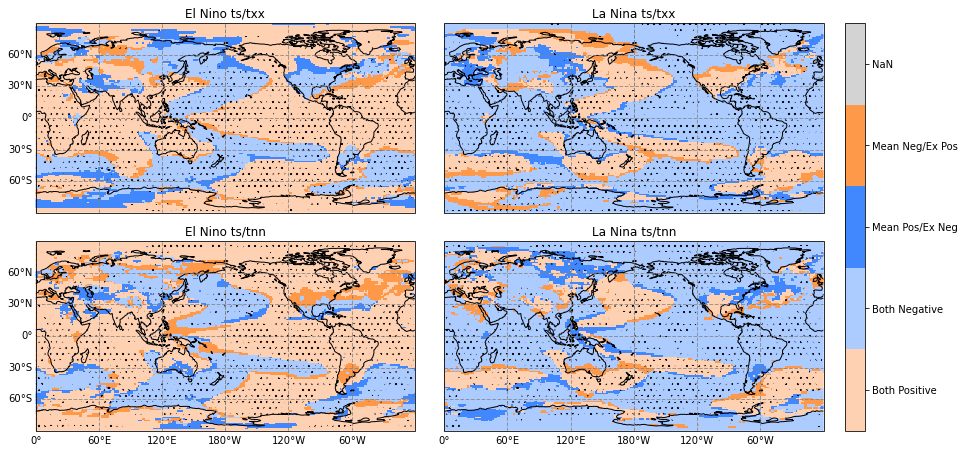

In [25]:
fig = plt.figure(figsize = (15, 7.5))
gs = gridspec.GridSpec(2,3, wspace=0.05, hspace=.15, width_ratios=[1, 1, 0.05])

ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(180))
im = elnino_sc_ts_txx.plot(ax=ax, cmap=cmap, norm=norm, levels=bounds+0.5, add_colorbar=False, transform=ccrs.PlateCarree())
elnino_ts_txx_same_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
elnino_ts_txx_opp_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('El Nino ts/txx')
ax = func.format_gridlines(ax, left_labels=True) 

ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(180))
im = lanina_sc_ts_txx.plot(ax=ax, cmap=cmap, norm=norm, levels=bounds+0.5, add_colorbar=False, transform=ccrs.PlateCarree())
lanina_ts_txx_same_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
lanina_ts_txx_opp_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('La Nina ts/txx')
ax = func.format_gridlines(ax)

ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(180))
im = elnino_sc_ts_tnn.plot(ax=ax, cmap=cmap, norm=norm, levels=bounds+0.5, add_colorbar=False, transform=ccrs.PlateCarree())
elnino_ts_tnn_same_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
elnino_ts_tnn_opp_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('El Nino ts/tnn')
ax = func.format_gridlines(ax, left_labels=True, bottom_labels=True) 

ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(180))
im = lanina_sc_ts_tnn.plot(ax=ax, cmap=cmap, norm=norm, levels=bounds+0.5, add_colorbar=False, transform=ccrs.PlateCarree())
lanina_ts_tnn_same_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
lanina_ts_tnn_opp_mask.plot.contourf(ax=ax, alpha=0, add_colorbar=False, hatches=[None, '..'], transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_title('La Nina ts/tnn')
ax = func.format_gridlines(ax, bottom_labels=True)

# Colorbar 
cax = plt.subplot(gs[:, 2])
cbar = plt.colorbar(im, cax, ticks=bounds) 
cbar.ax.set_yticklabels(['empty', 'Both Positive', 'Both Negative', 'Mean Pos/Ex Neg', 'Mean Neg/Ex Pos', 'NaN',]);

#plt.savefig('CMIP6_ENSO_comps_ts_txx_tnn_sign_comp', bbox_inches='tight', dpi=300)

In [ ]:
# Alternate colorbar 
# color_array = ['#FFD1B3', '#8CD3FF', '#009DFF', '#FE994A', 'lightgrey']
# cmap = mpl.colors.ListedColormap(color_array)
# bounds=np.arange(-1,5)
# norm=mpl.colors.BoundaryNorm(bounds+0.5, cmap.N)

### IPCC AR6 Regions

In [2]:
ts = xr.open_dataarray('/g/data/w40/rl5183/CMIP6_20_ts_quad_detrend_1900_2015.nc')
shapefile = xr.open_dataarray('ar6_regions_v2.nc')

In [3]:
# need to regrid 
import xesmf
import cf_xarray

ds_bnds = shapefile.to_dataset().cf.add_bounds(['lat','lon'])
sample_bnds = ts.to_dataset().cf.add_bounds(['lat','lon'])

regrid = xesmf.Regridder(ds_bnds, sample_bnds, method='conservative_normed')

shapefile = regrid(shapefile)

In [4]:
# Calculate Nino3.4 index
nino34_list = []
for m in ts.model:
    nino34_list.append(func.nino34_index(ts.sel(model=m), '1950-01', '1979-12'))
nino34 = xr.DataArray(nino34_list, dims=['model', 'time'], coords=[ts.model, ts.time])

In [5]:
def nino_scatter_by_region(data, nino, region):
    
    nino_q = nino.resample(time='QS-DEC').mean('time')
    nino_djf = nino_q.isel(time=slice(0,None,4))
    
    clim = data.sel(time=slice('1950','1979')).groupby('time.month').mean()
    anom = data.groupby('time.month') - clim
    anom_q = anom.resample(time='QS-DEC').mean('time')
    anom_djf = anom_q.isel(time=slice(0,None,4))
    
    pos_nino = nino_djf.where(nino_djf > 0, drop=True)
    neg_nino = nino_djf.where(nino_djf < 0, drop=True)
    
    # initiate plot
    num_plots = len(region)
    num_cols = 3
    num_rows = int(np.ceil(num_plots/num_cols))
    
    fig = plt.figure(figsize = (20, 5*num_rows))
    # select out region
    for i in np.arange(0,len(region),1):
        region_data = anom_djf.where(shapefile == region[i], drop=True).mean(dim=['lat', 'lon'])
        region_pos = region_data.where(nino_djf > 0, drop=True)
        region_neg = region_data.where(nino_djf < 0, drop=True)
        
        ax = fig.add_subplot(num_rows,num_cols,i+1)
        
        ax.scatter(pos_nino, region_pos, c='r')
        m, b = np.polyfit(pos_nino, region_pos, 1)
        plt.plot(pos_nino, m*pos_nino + b, c='r', label=f'Slope = {round(m, 2)}')
        
        ax.scatter(neg_nino, region_neg, c='b')
        m, b = np.polyfit(neg_nino, region_neg, 1)
        plt.plot(neg_nino, m*neg_nino + b, c='b', label=f'Slope = {round(m, 2)}')
        
        ax.legend()
        ax.title.set_text(f'Region {region[i]}')

In [ ]:
# Try and make it so each column is a variable and each row is a region (or vice versa) 
# Select regions based on differences in spatial plot 
# Region 46 SAU, 16 SES, 26 NEAF
# Do for all models individually, not MMM

In [ ]:
# TXx
regrid_paths = '/g/data/w40/rl5183/CMIP6_ETCCDI_txx_regrid/*'
ds = xr.open_mfdataset(regrid_paths, combine='nested', concat_dim='model', chunks={'time':-1, 'lat':110, 'lon':110})
ds.coords['model'] = ts.model
txx = ds.txxETCCDI.sel(time=slice('1900-01', '2014-12'))

txx_dt = xr.apply_ufunc(func.quad_detrend, txx, 
                             input_core_dims=[['time']],
                             output_core_dims=[['time']],
                             vectorize=True,
                             dask='parallelized')

txx_dt = txx_dt.transpose(*txx.dims).chunk('auto')

In [ ]:
# TNn
regrid_paths = '/g/data/w40/rl5183/CMIP6_ETCCDI_tnn_regrid/*'
ds = xr.open_mfdataset(regrid_paths, combine='nested', concat_dim='model', chunks={'time':-1, 'lat':110, 'lon':110})
ds.coords['model'] = ts.model
tnn = ds.tnnETCCDI.sel(time=slice('1900-01', '2014-12'))

tnn_dt = xr.apply_ufunc(func.quad_detrend, tnn, 
                             input_core_dims=[['time']],
                             output_core_dims=[['time']],
                             vectorize=True,
                             dask='parallelized')

tnn_dt = tnn_dt.transpose(*tnn.dims).chunk('auto')

In [15]:
def nino_scatter_by_model(data1, data2, data3, nino, region):
        
    nino_q = nino.resample(time='QS-DEC').mean('time')
    nino_djf = nino_q.isel(time=slice(0,None,4))
    
    region_data = data1.where(shapefile == region, drop=True)
    clim = region_data.sel(time=slice('1950','1979')).groupby('time.month').mean()
    anom = region_data.groupby('time.month') - clim
    anom_q = anom.resample(time='QS-DEC').mean('time')
    anom_djf = anom_q.isel(time=slice(0,None,4))
    ydata1 = anom_djf.mean(dim=['lat', 'lon']).compute() 
    
    region_data = data2.where(shapefile == region, drop=True)
    clim = region_data.sel(time=slice('1950','1979')).groupby('time.month').mean()
    anom = region_data.groupby('time.month') - clim
    anom_q = anom.resample(time='QS-DEC').mean('time')
    anom_djf = anom_q.isel(time=slice(0,None,4))
    ydata2 = anom_djf.mean(dim=['lat', 'lon']).compute()
    
    region_data = data3.where(shapefile == region, drop=True)
    clim = region_data.sel(time=slice('1950','1979')).groupby('time.month').mean()
    anom = region_data.groupby('time.month') - clim
    anom_q = anom.resample(time='QS-DEC').mean('time')
    anom_djf = anom_q.isel(time=slice(0,None,4))
    ydata3 = anom_djf.mean(dim=['lat', 'lon']).compute()
    
    # initiate plot
    num_cols = 3
    num_rows = 20
    i = 0
    
    fig = plt.figure(figsize = (20, 5*num_rows))
    # select out model
    for m in data1.model:
        
        model_nino = nino_djf.sel(model=m)
        
        pos_nino = model_nino.where(model_nino > 0, drop=True)
        neg_nino = model_nino.where(model_nino < 0, drop=True)
    
        y1 = ydata1.sel(model=m)
        y1_pos = y1.where(nino_djf > 0, drop=True)
        y1_neg = y1.where(nino_djf < 0, drop=True)
        
        y2 = ydata2.sel(model=m)
        y2_pos = y2.where(nino_djf > 0, drop=True)
        y2_neg = y2.where(nino_djf < 0, drop=True)
        
        y3 = ydata3.sel(model=m)
        y3_pos = y3.where(nino_djf > 0, drop=True)
        y3_neg = y3.where(nino_djf < 0, drop=True)
        
        # Plot Ts for model m
        ax = fig.add_subplot(num_rows,num_cols,i+1)
        
        ax.scatter(pos_nino, y1_pos, c='r')
        m, b = np.polyfit(pos_nino, y1_pos, 1)
        plt.plot(pos_nino, m*pos_nino + b, c='r', label=f'Slope = {round(m, 2)}')
        
        ax.scatter(neg_nino, y1_neg, c='b')
        m, b = np.polyfit(neg_nino, y1_neg, 1)
        plt.plot(neg_nino, m*neg_nino + b, c='b', label=f'Slope = {round(m, 2)}')
        
        ax.legend()
        ax.title.set_text(f'Ts {m}')
        
        # Plot TXx for model m 
        ax = fig.add_subplot(num_rows,num_cols,i+2)
        
        ax.scatter(pos_nino, y2_pos, c='r')
        m, b = np.polyfit(pos_nino, y2_pos, 1)
        plt.plot(pos_nino, m*pos_nino + b, c='r', label=f'Slope = {round(m, 2)}')
        
        ax.scatter(neg_nino, y2_neg, c='b')
        m, b = np.polyfit(neg_nino, y2_neg, 1)
        plt.plot(neg_nino, m*neg_nino + b, c='b', label=f'Slope = {round(m, 2)}')
        
        ax.legend()
        ax.title.set_text(f'TXx {m}')
        
        # Plot TXx for model m 
        ax = fig.add_subplot(num_rows,num_cols,i+3)
        
        ax.scatter(pos_nino, y3_pos, c='r')
        m, b = np.polyfit(pos_nino, y3_pos, 1)
        plt.plot(pos_nino, m*pos_nino + b, c='r', label=f'Slope = {round(m, 2)}')
        
        ax.scatter(neg_nino, y3_neg, c='b')
        m, b = np.polyfit(neg_nino, y3_neg, 1)
        plt.plot(neg_nino, m*neg_nino + b, c='b', label=f'Slope = {round(m, 2)}')
        
        ax.legend()
        ax.title.set_text(f'TNn {m}')
        
        i=i+1

In [16]:
data1 = ts.isel(model=[0,1])
data2 = ts.isel(model=[2,3])
data3 = ts.isel(model=[4,5])

In [ ]:
nino_scatter_by_model(data1, data2, data3, nino34, 46)

CPU times: user 1min 15s, sys: 31.2 s, total: 1min 46s
Wall time: 3min 59s


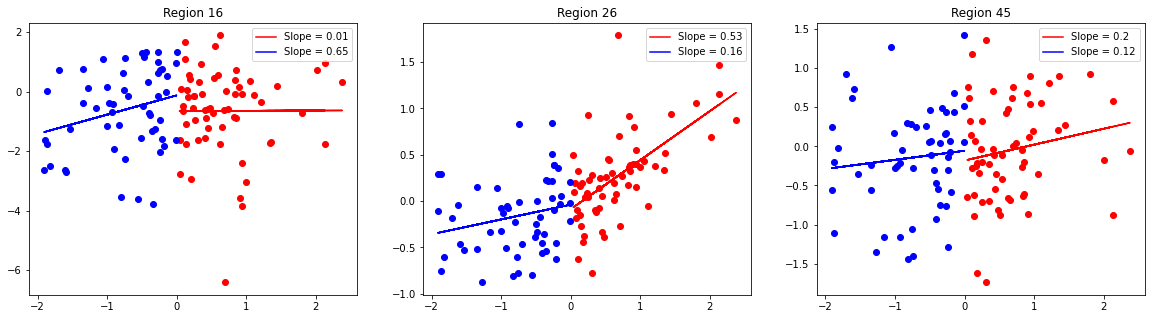

In [52]:
%%time
regions = [16, 26, 45]
nino_scatter_by_region(ts.isel(model=0), nino34.isel(model=0), regions)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 115 times more chunks
  return self.array[key]


CPU times: user 3min 55s, sys: 44.3 s, total: 4min 40s
Wall time: 6min 47s


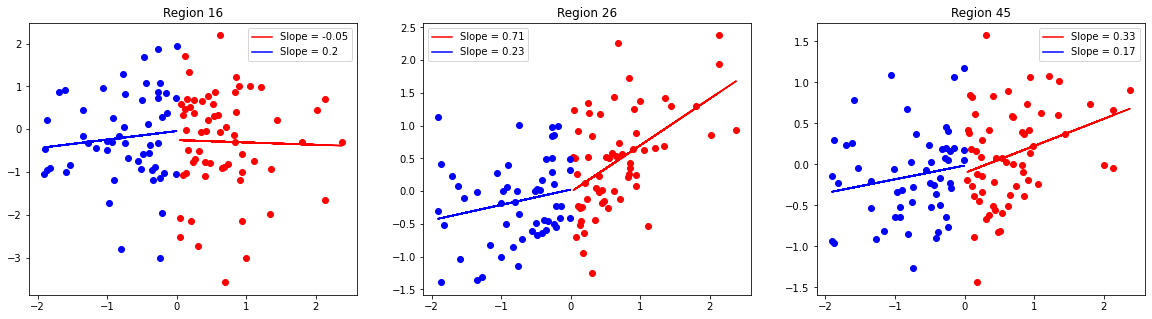

In [55]:
%%time
regions = [16, 26, 45]
nino_scatter_by_region(txx_dt.isel(model=0), nino34.isel(model=0), regions)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 115 times more chunks
  return self.array[key]


CPU times: user 3min 57s, sys: 42.4 s, total: 4min 39s
Wall time: 6min 42s


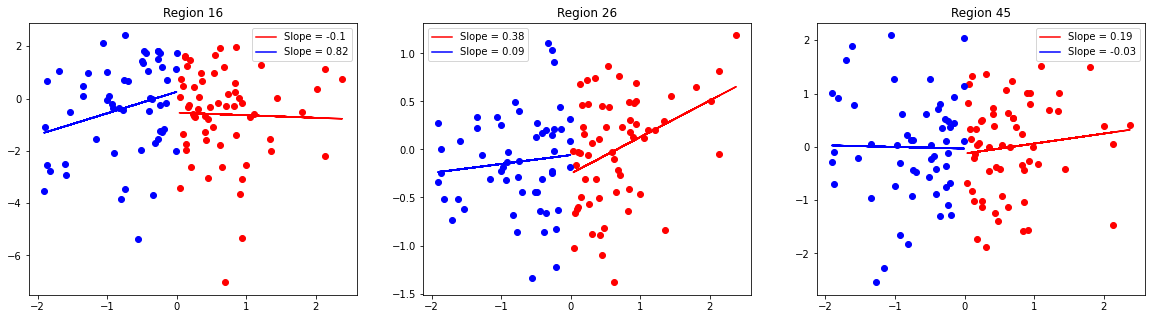

In [57]:
%%time
regions = [16, 26, 45]
nino_scatter_by_region(tnn_dt.isel(model=0), nino34.isel(model=0), regions)